In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/superheros-abilities-dataset/superhero_abilities_dataset.csv


Load the Dataset

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/kaggle/input/superheros-abilities-dataset/superhero_abilities_dataset.csv')
#analysing the first five rows
df.head()


,Name,Universe,Alignment,Strength,Speed,Intelligence,Combat Skill,Weapon,Power Score,Popularity Score
0,Iron Man #1,Marvel,Anti-Hero,1.0,1.0,2.0,5,Sword,65,40
1,Batman #1,DC,Anti-Hero,5.0,4.0,6.0,2,Shield,94,98
2,Joker #1,Marvel,Hero,3.0,9.0,2.0,5,Hammer,62,40
3,Thor #1,Marvel,Hero,1.0,6.0,2.0,8,Claws,83,91
4,Thanos #1,Marvel,Villain,4.0,3.0,2.0,9,Claws,78,77


Dataset Overview

In [3]:
# Basic structure
df.shape

# Data types and missing values
df.info()

# Summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              200 non-null    object 
 1   Universe          200 non-null    object 
 2   Alignment         200 non-null    object 
 3   Strength          190 non-null    float64
 4   Speed             190 non-null    float64
 5   Intelligence      190 non-null    float64
 6   Combat Skill      200 non-null    int64  
 7   Weapon            171 non-null    object 
 8   Power Score       200 non-null    int64  
 9   Popularity Score  200 non-null    int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 15.8+ KB


,Strength,Speed,Intelligence,Combat Skill,Power Score,Popularity Score
count,190.000000,190.000000,190.000000,200.000000,200.0000,200.000000
mean,5.668421,5.352632,5.568421,5.385000,71.4200,50.985000
std,3.036036,2.907183,2.915576,2.843802,18.4201,29.474029
min,1.000000,1.000000,1.000000,1.000000,40.0000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,54.0000,26.750000
50%,5.000000,5.000000,6.000000,5.000000,73.0000,49.000000
75%,8.000000,8.000000,8.000000,8.000000,88.0000,77.250000
max,10.000000,10.000000,10.000000,10.000000,100.0000,100.000000


Handling Missing Values

In [4]:
# Count missing values
df.isnull().sum()

# Fill missing numeric values with median
df[['Strength', 'Speed', 'Intelligence']] = df[['Strength', 'Speed', 'Intelligence']].fillna(df.median(numeric_only=True))

# Fill missing categorical values with mode
df['Weapon'] = df['Weapon'].fillna(df['Weapon'].mode()[0])


Visualization

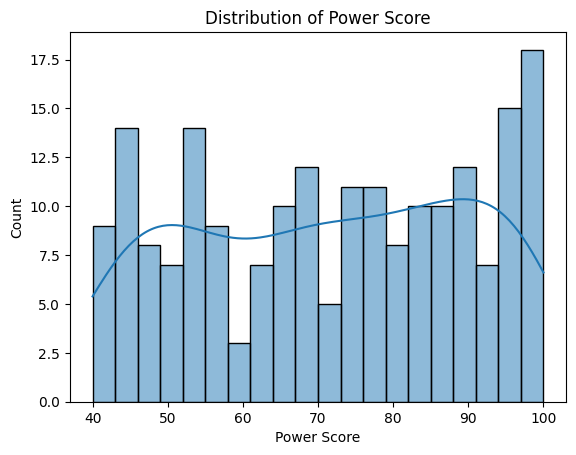

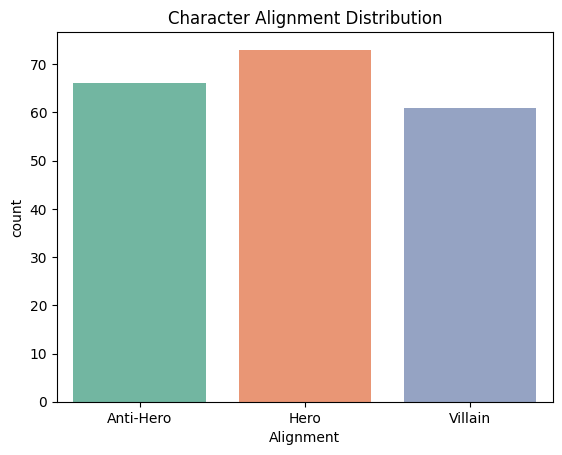

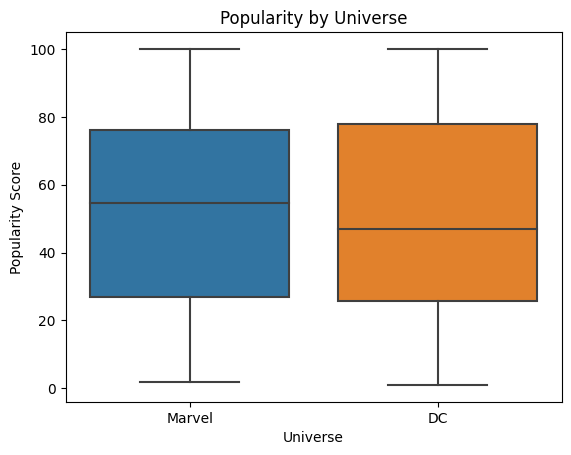

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

#suppresion of warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Distribution of Power Score
sns.histplot(df['Power Score'], bins=20, kde=True)
plt.title('Distribution of Power Score')
plt.show()

# Alignment counts
sns.countplot(data=df, x='Alignment', palette='Set2')
plt.title('Character Alignment Distribution')
plt.show()

# Universe vs Popularity
sns.boxplot(data=df, x='Universe', y='Popularity Score')
plt.title('Popularity by Universe')
plt.show()


Correlation Heatmap

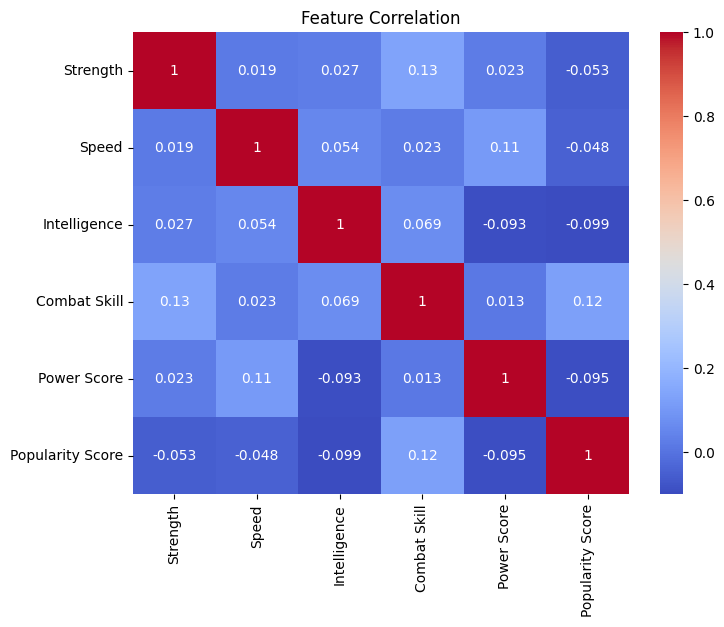

In [6]:
# Correlation matrix
corr = df.select_dtypes(include='number').corr()

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()


Predict Alignment

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Encode categorical features
df_encoded = df.copy()
le = LabelEncoder()
df_encoded['Universe'] = le.fit_transform(df_encoded['Universe'])
df_encoded['Weapon'] = le.fit_transform(df_encoded['Weapon'])
df_encoded['Alignment'] = le.fit_transform(df_encoded['Alignment'])  # Target variable

# Features and labels
X = df_encoded.drop(columns=['Name', 'Alignment'])
y = df_encoded['Alignment']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.29      0.33      0.31        12
           1       0.22      0.29      0.25        14
           2       0.38      0.21      0.27        14

    accuracy                           0.28        40
   macro avg       0.29      0.28      0.28        40
weighted avg       0.29      0.28      0.28        40



- This fictional dataset is great for practicing EDA and ML.
- Random Forest did well at predicting Alignment with minimal feature engineering.
- You can extend this project by testing other models, clustering characters, or creating dashboards!

Note: This was just a sample notebook with basic data preproccessing, so please do not judge based on the accuracy score!

Try predicting Power Score (regression), or visualizing the strongest heroes by weapon type next.
